In [1]:
import gym_bandits
import gym
import numpy as np
import random

In [2]:
class BanditAgent():
    def __init__(self, epsilon):
        
        self.epsilon = epsilon
        
        self.rewardsPerAction = np.array([
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0
        ])
        self.actionCounts = np.array([
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0
        ])
    
    def Q(self, a):
        if self.actionCounts[a] == 0:
            return 0
        
        estimated_value = self.rewardsPerAction[a] / self.actionCounts[a]
        return estimated_value
    
    def getAllValueEstimates(self):
        
        estimates = np.zeros((9,))
        for action in range(len(estimates)):
            estimates[action] = self.Q(action)
        
        return estimates
        
    
    def greedy_policy(self):
        action = np.argmax(self.getAllValueEstimates())
        return action
    
    def e_greedy_policy(self):
        if random.random() < self.epsilon:
            return random.randint(0, 9)
        else:
            return self.greedy_policy()
    
    def train(self, action_taken, reward):
        self.rewardsPerAction[action_taken] += reward
        self.actionCounts += 1
        
        

In [3]:
class BanditAgentRollingPredictions():
    def __init__(self, epsilon):
        
        self.epsilon = epsilon
        
        self.actionCounts = np.array([
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0
        ])
        
        self.valuePredictions = np.array([
            0.,
            0.,
            0.,
            0.,
            0.,
            0.,
            0.,
            0.,
            0.,
            0.
        ])
        
        
        
    def greedy_policy(self):
        action = np.argmax(self.valuePredictions)
        return action
    
    def e_greedy_policy(self):
        if random.random() < self.epsilon:
            return random.randint(0, 9)
        else:
            return self.greedy_policy()
    
    def train(self, action_taken, reward):
        self.actionCounts[action_taken] += 1
        
        error = (reward - self.valuePredictions[action_taken])
        lr = step_size
        
        new_Q = self.valuePredictions[action_taken] + lr * error
        
        self.valuePredictions[action_taken] = new_Q
        

In [4]:
env = gym.make("BanditTenArmedGaussian-v0")
env.reset()

0

In [5]:
game_length = 9000
agent = BanditAgentRollingPredictions(0.01)

rewards = []

for i in range(game_length):
    action = agent.e_greedy_policy()
    _, reward, _, _ = env.step(action)
    agent.train(action, reward)
    rewards.append(reward)

In [6]:
from matplotlib import pyplot as plt

2.1080585101984863

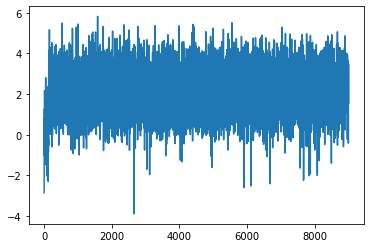

In [7]:
plt.plot(rewards)
np.mean(rewards)

In [8]:
env.r_dist

[[-1.335354978566212, 1],
 [0.4099205533975954, 1],
 [0.35455808638386777, 1],
 [0.7932655115595241, 1],
 [-0.510507388990616, 1],
 [2.1676359992954417, 1],
 [-0.7061388501780564, 1],
 [-1.0853544196464266, 1],
 [0.46565132144243265, 1],
 [0.045171303762423246, 1]]

In [9]:
agent.valuePredictions

array([-3.05414153,  0.05238304,  0.26278471,  0.73576993, -0.61878613,
        2.15481535, -1.15708551, -0.95793364,  1.16430395,  0.39071888])

In [10]:
2.0004571277448653 * 0.9

1.8004114149703787

*Exercise 2.5 (programming)* Design and conduct an experiment to demonstrate the
difficulties that sample-average methods have for nonstationary problems. Use a modified
version of the 10-armed testbed in which all the q\*(a) start out equal and then take
independent random walks (say by adding a normally distributed increment with mean
zero and standard deviation 0.01 to all the q\*(a) on each step). Prepare plots like
Figure 2.2 for an action-value method using sample averages, incrementally computed,
and another action-value method using a constant step-size parameter, alpha = 0.1. Use
epsilon = 0.1 and longer runs, say of 10,000 steps.

In [33]:
env2 = gym.make("BanditTenArmedNonstationaryConstantGaussian-v0")
env2.r_dist = [[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]]
game_length = 10_000
agent = BanditAgent(0.1)

rewards = []

for i in range(game_length):
    action = agent.e_greedy_policy()
    _, reward, _, _ = env2.step(action)
    agent.train(action, reward)
    rewards.append(reward)

0.7164174586675305

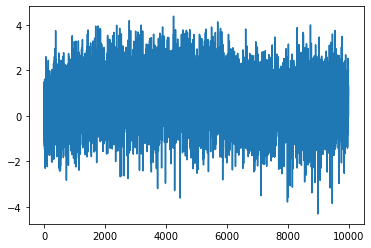

In [34]:
plt.plot(rewards)
np.mean(rewards)